<a href="https://colab.research.google.com/github/sabrinafn/machine_learning_python/blob/main/medium0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Read the data from the CSV file
data = pd.read_csv('cancer.csv')

In [ ]:
# Display the first few rows of the dataset
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [ ]:
# Generate descriptive statistics for the dataset
data.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


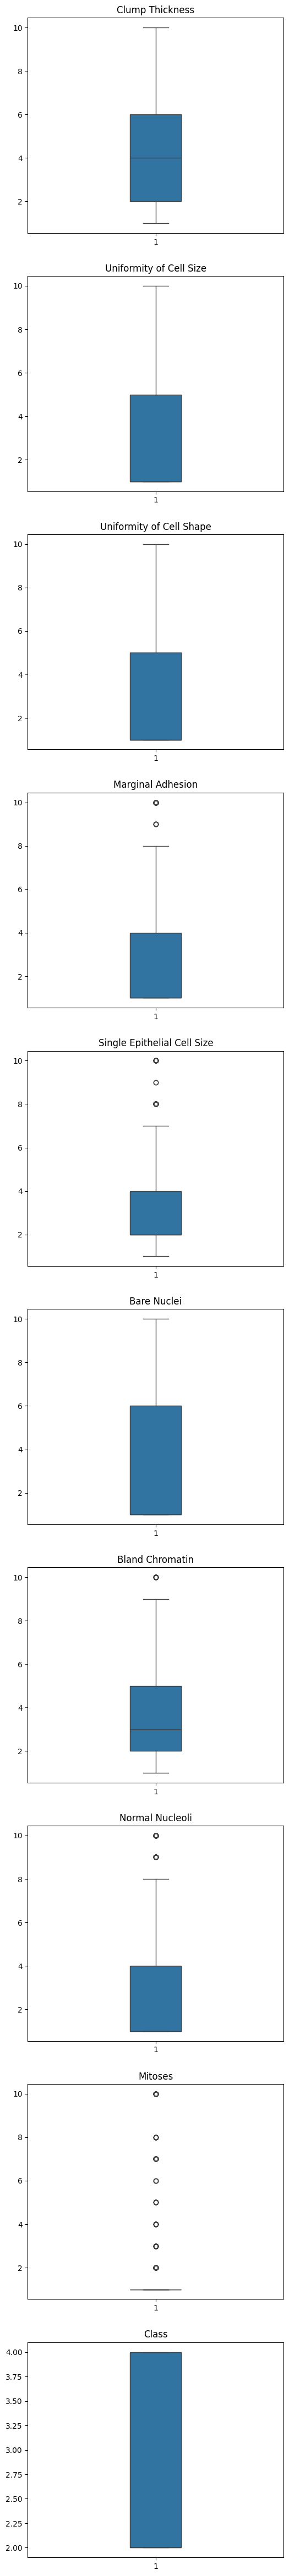

In [ ]:
# create array of headers
headers = data.columns.tolist()

# Visualize box plots for each numerical feature
fig, axes = plt.subplots(10, 1, figsize=(6, 60))

for i, ax in enumerate(axes):
    sns.boxplot(data=data, x=1, y=headers[i], ax=ax, width=0.2)
    ax.set_ylabel('')
    ax.set_title(headers[i])


<Axes: >

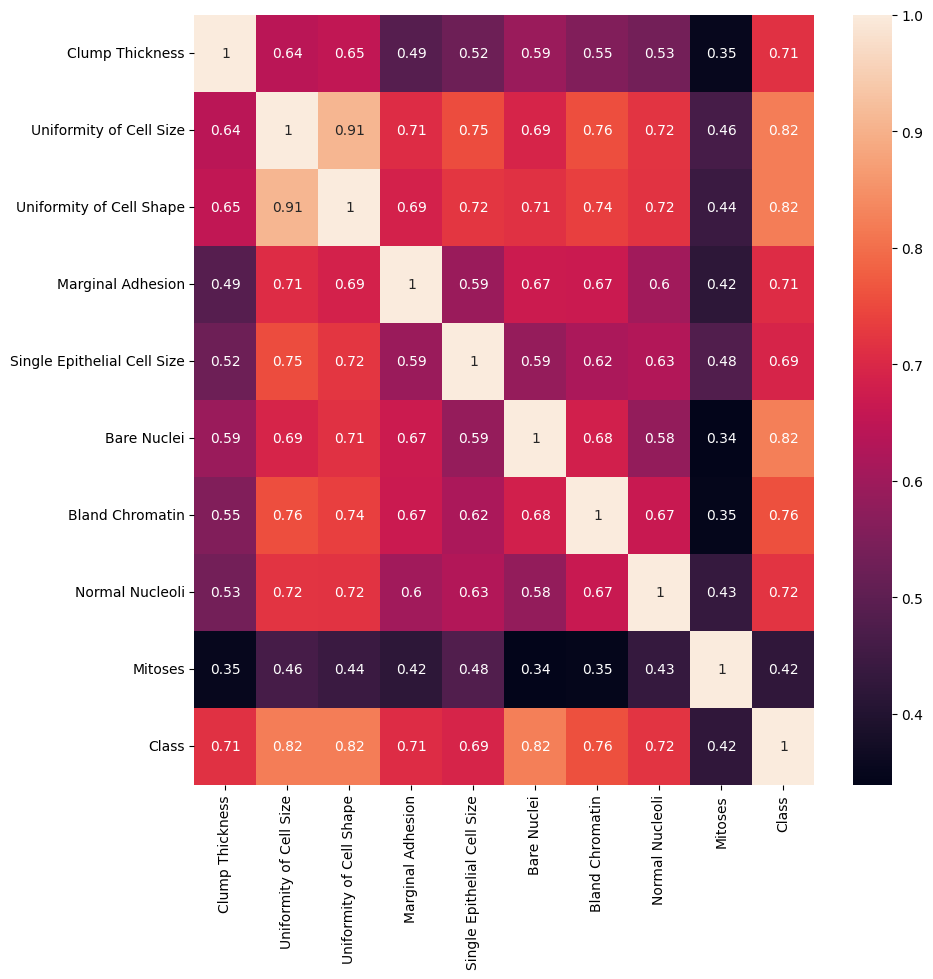

In [ ]:
# Visualize the correlation matrix using a heatmap
corr_matrix = data.corr()

## heatmap = graph that represents the magnitude of values with colors
# this is a correlation heat map

# Create a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True)

In [ ]:
# Separate features and target variable
X = data.drop(['Class'], axis=1)  # all columns, but 'Class'
y = data['Class']                 # only 'Class'

##### 'Class' defines if the cancer is malignant or benign
# 2 = benigno
# 4 = maligno

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Print the lengths of training and testing sets
print("Training set length:", len(X_train), "\nTesting set length:", len(X_test))
print("Training labels length:", len(y_train), "\nTesting labels length:", len(y_test))

Training set length: 478 
Testing set length: 205
Training labels length: 478 
Testing labels length: 205


In [ ]:
from sklearn.metrics import accuracy_score

# Import LogisticRegression from scikit-learn
from sklearn.linear_model import LogisticRegression

# Create an instance of LogisticRegression
# LibLinear = a algorithm solver ideal for small databases
model = LogisticRegression(solver='liblinear')

# Fit the model on the training data
# fit = learn from the data
model.fit(X_train, y_train)

# Make predictions on the testing data
# predict = applies what was learned to new data and returns the predictions
prediction = model.predict(X_test)

# Calculate and print the accuracy score of the model
accuracy = accuracy_score(y_test, prediction)
print("Accuracy:", accuracy)

Accuracy: 0.9707317073170731


Confusion Matrix:
[[131   1]
 [  5  68]]


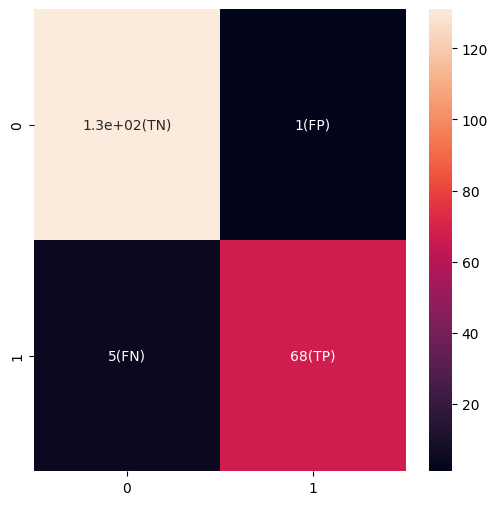

In [ ]:
# Import confusion_matrix from scikit-learn
from sklearn.metrics import confusion_matrix

## Generate the confusion matrix
# confusion matrix = evaluate the performance of a model. The number of correct and incorrect predictions are summed up in each class.
# The dimension of this matrix is 2x2 because this model has a binary classification: 2 = benigno & 4 = maligno
cm = confusion_matrix(y_test, prediction)

labels = np.array([
    [f"{cm[0,0]:.1e}(TN)", f"{cm[0,1]}(FP)"],
    [f"{cm[1,0]}(FN)", f"{cm[1,1]}(TP)"]
])

# Create a heatmap of the confusion matrix
# this is confusion matrix heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=labels, fmt='')

# annot=labels = put values inside each cell
# fmt='' = value format

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

In [ ]:
# Import classification_report from scikit-learn
from sklearn.metrics import classification_report

# Generate the classification report
target_names = ['class 2    (benign)', 'class 4 (malignant)']
clr = classification_report(y_test, prediction, target_names=target_names)

# Print the classification report
print("Classification Report:\n")
print(clr)

## class 2 (benign)
# precision 0.96 = 96% of cancer benign cases identified as benign
# recall 0.99 = from all identified as benign, 1% were false positive

## class 4 (malignant)
# precision 0.99 = 96% of cancer malignant cases identified as malignant
# recall 0.93 = from all identified as malignant, 7% were false negative

# F1 score is the harmonic mean of precision and recall:

# overall accuracy 0.97 = 97% of accuracy

Classification Report:

                     precision    recall  f1-score   support

class 2    (benign)       0.96      0.99      0.98       132
class 4 (malignant)       0.99      0.93      0.96        73

           accuracy                           0.97       205
          macro avg       0.97      0.96      0.97       205
       weighted avg       0.97      0.97      0.97       205

